# Model Evaluation

In [1]:
from mwdata.modeling.score import metric_table, confusion_matrix, roc_curve_plot, pr_curve_plot, prediction_distribution_plot

## Load Wine Dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
df = pd.DataFrame(data.data, columns=list(data.feature_names))
df['target'] = data.target
df = df[df.target != 2]

# Reduce model performance
df.loc[[1, 5, 16, 46], 'target'] = [1, 1, 1, 1]

## Build a simple classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], test_size=0.2, random_state=1)

In [6]:
rf = RandomForestClassifier(random_state=1, n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1] # predict_proba() returns an (n x m) array where m is number of classes

## Metrics Table

In [7]:
metric_table(y_test, y_pred_proba)

,Accuracy,Precision,Recall,F1,AUC
0,0.961538,1.0,0.928571,0.962963,0.985119


## Confusion Matrix

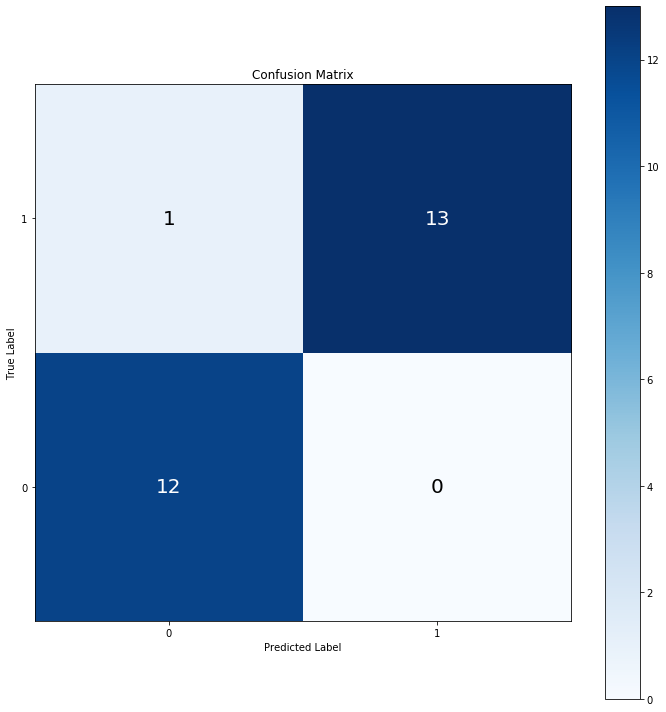

In [8]:
confusion_matrix(y_test, y_pred)

## ROC Curve

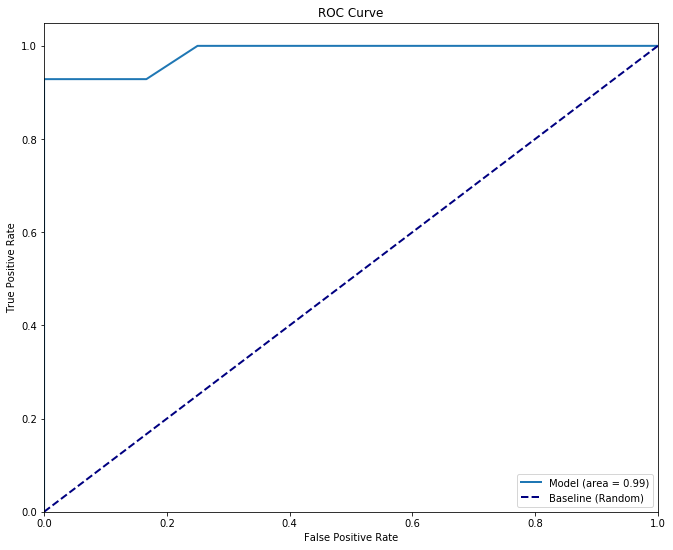

In [9]:
roc_curve_plot(y_test, y_pred_proba)

## Precision-Recall Curve

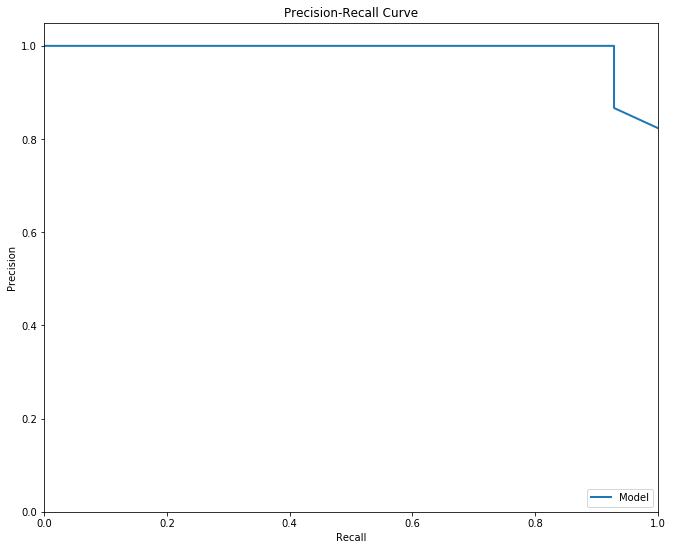

In [10]:
pr_curve_plot(y_test, y_pred_proba)

## Prediction Distributions

In [11]:
import warnings
warnings.filterwarnings('ignore')

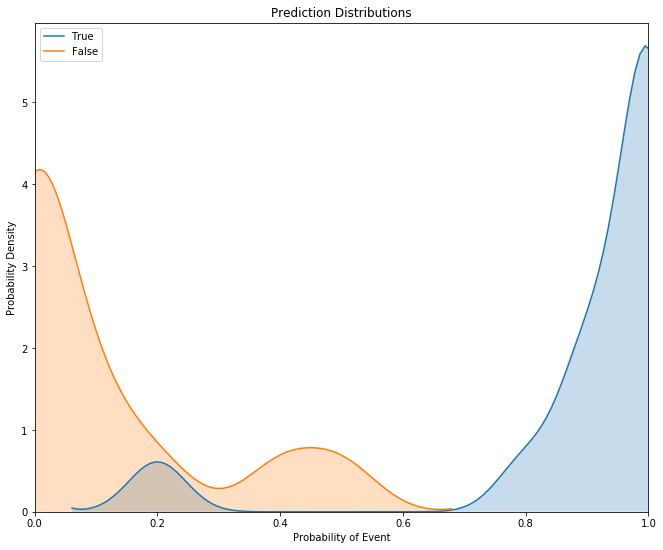

In [12]:
prediction_distribution_plot(y_test, y_pred_proba)